# <font color=green>Sentiment Analysis</font>

# <font color=orange>Click bellow for redirecting to repsective pages</font>

1. [Exploring the dataset](#Exploring-the-dataset)

   
2. [Conversion of text to Cross Sectional Data](#Conversion-of-text-to-Cross-Sectional-Data)


3. [Naive Bayes Model](#Naive-Bayes-Model)

### Load the data 

##### 1 is positive Review and 0 is Negative Review

In [48]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
train_ds = pd.read_csv( "data_for_sentiment_analysis", delimiter="\t" )

In [49]:
train_ds.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [50]:
train_ds[train_ds.sentiment == 1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [51]:
train_ds[train_ds.sentiment == 0][0:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty ..."
3945,0,"The Da Vinci Code comes out tomorrow, which su..."
3946,0,i thought the da vinci code movie was really b...
3947,0,"God, Yahoo Games has this truly-awful looking ..."


# Exploring the dataset

In [52]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
sentiment    6918 non-null int64
text         6918 non-null object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [53]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure( figsize=(6,5))

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

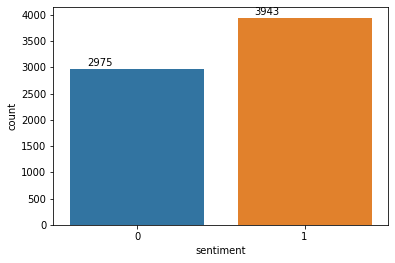

In [54]:
# create count plot
ax = sn.countplot(x='sentiment', data=train_ds)
# annotate
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

In [55]:
review_volume = train_ds["sentiment"].value_counts()

In [56]:
(review_volume[0]/train_ds.shape[0])*100

43.00375831165076

In [57]:
(review_volume[1]/train_ds.shape[0])*100

56.99624168834924

### Inference : The no. of data points for both the catagres are balanced and hence it is good to proceed with Classification

# Conversion of text to Cross Sectional Data

* Count Vector Model (Bag Of Word)
* Term Frequency model
* Term Frequency - Inverse Document Frequency (TF-IDF) model
* Ngram(s) model

### Count Vector Model

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.text )

In [59]:
feature_vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [60]:
# Get the feature names
features = feature_vector.get_feature_names()
print( "Total number of features: ", len(features))

Total number of features:  2132


In [61]:
import random
random.sample(features, 10)

['could',
 'romantic',
 'point',
 'anywhere',
 'generally',
 'altogether',
 'suppose',
 'grand',
 'avatar',
 'tomorrow']

In [62]:
train_ds_features = count_vectorizer.transform( train_ds.text )
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [63]:
train_ds_features

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

## Displaying Document Vectors

In [64]:
# Converting the matrix to a dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())

In [65]:
# Setting the column names to the features i.e. words
train_ds_df.columns = features

In [66]:
train_ds_df.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
train_ds[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


In [68]:
train_ds_df.iloc[0:1, 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


### Removing low frequency words

In [69]:
# summing up the occurances of features column wise
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
features_counts

array([ 1,  1,  4, ...,  1, 80,  1], dtype=int64)

In [70]:
feature_counts_df = pd.DataFrame( dict( features = features,
counts = features_counts ) )

In [71]:
feature_counts_df

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1
...,...,...
2127,yuck,1
2128,yuh,1
2129,zach,1
2130,zen,80


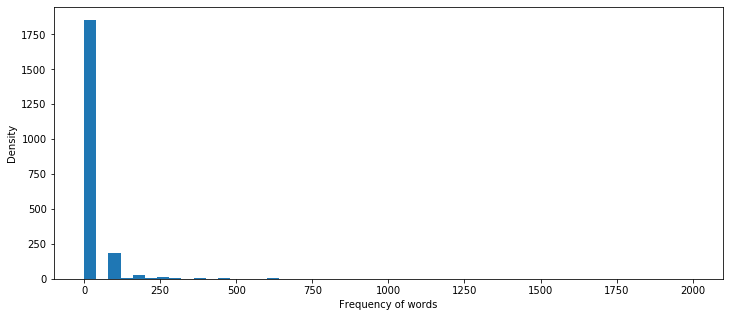

In [72]:
plt.figure( figsize=(12,5))
plt.hist(feature_counts_df.counts, bins=50, range = (0, 2000));
plt.xlabel( 'Frequency of words' )
plt.ylabel( 'Density' );

In [73]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000)
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.text )
# Get the feature names
features = feature_vector.get_feature_names()
# Transform the document into vectors
train_ds_features = count_vectorizer.transform( train_ds.text )
# Count the frequency of the features
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )

In [74]:
feature_counts

,features,counts
0,10,4
1,17,3
2,33,2
3,6th,3
4,aaron,2
...,...,...
995,yesterday,2
996,yet,8
997,you,331
998,your,9


### Removing Stop Words 

In [75]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS

In [76]:
len(my_stop_words)

318

In [77]:
# Adding custom words to the list of stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union( ['harry', 'potter', 'code', 'vinci', 'da','harry', 'mountain', 'movie', 'movies'])

In [78]:
len(my_stop_words)

326

## Creating Count Vectors with removal of Stop Words and Considering highly frequent words 

In [79]:
count_vectorizer = CountVectorizer( stop_words = my_stop_words,max_features = 1000 )
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,counts = features_counts ) )

In [80]:
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


In [81]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

In [82]:
def stemmed_words(doc):
    ### Stemming of words
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
    ### Remove the words in stop words list
    non_stop_words = [ word for word in list(set(stemmed_words) - set(my_stop_words)) ]
    return non_stop_words

### Features with Stemmed Words and filtered by Stop Words which are highly frequent word  

In [83]:
count_vectorizer = CountVectorizer( analyzer=stemmed_words, max_features = 1000)
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1116
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823


In [84]:
# Convert the document vector matrix into dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Assign the features names to the column
train_ds_df.columns = features
# Assign the sentiment labels to the train_ds
train_ds_df['sentiment'] = train_ds.sentiment

In [85]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,train_ds.sentiment,test_size = 0.3,random_state = 42 )

### Naive Bayes Model

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



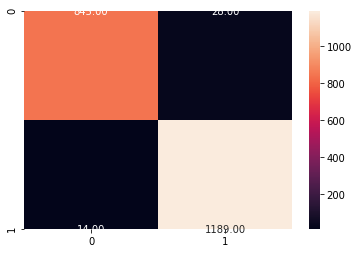

In [86]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )

test_ds_predicted = nb_clf.predict( test_X.toarray() )

from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

from sklearn import metrics
cm = metrics.confusion_matrix( test_y, test_ds_predicted )
sn.heatmap(cm, annot=True, fmt='.2f' );

In [87]:
COLUMN_NAMES = ["Process","Model Name", "F1 Scores","Range of F1 Scores","Std Deviation of F1 Scores"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)

In [88]:
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores


In [89]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn import metrics

In [90]:
def stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y):
    global df_model_selection
    
    skf = StratifiedKFold(n_splits, random_state=29)
    
    weighted_f1_score = []
    print(skf.split(X,y))
    for train_index, val_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        
        
        model_obj.fit(X_train, y_train)##### HERE ###
        test_ds_predicted = model_obj.predict( X_test ) ##### HERE ####   
        #print( metrics.classification_report( y_test, test_ds_predicted ) )    
        weighted_f1_score.append(round(f1_score(y_test, test_ds_predicted , average='weighted'),2))
        
    sd_weighted_f1_score = np.std(weighted_f1_score, ddof=1)
    range_of_f1_scores = "{}-{}".format(min(weighted_f1_score),max(weighted_f1_score))    
    df_model_selection = pd.concat([df_model_selection,pd.DataFrame([[process,model_name,sorted(weighted_f1_score),range_of_f1_scores,sd_weighted_f1_score]], columns =COLUMN_NAMES) ])

In [91]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [92]:
model_obj = nb_clf
model_name = "Binomial Naive Bayes Classifier"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)


df_model_selection

<generator object _BaseKFold.split at 0x000002156B789948>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094


# Logistic Regression 

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X.toarray(), train_y)
test_ds_predicted = logreg.predict( test_X.toarray() )

In [94]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      1.00      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [95]:
model_obj = logreg
model_name = "Logistic Regression"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x00000215014EE1C8>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736


# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')

decision_tree.fit(train_X.toarray(), train_y)
test_ds_predicted = decision_tree.predict( test_X.toarray() )

In [97]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [98]:
model_obj = decision_tree
model_name = "Decission Tree"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x00000215013E4CC8>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094


# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

In [100]:
random_forest.fit(train_X.toarray(), train_y)
test_ds_predicted = random_forest.predict( test_X.toarray() )

In [101]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [102]:
model_obj = random_forest
model_name = "Random Forest"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x000002150145F5C8>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.92, 0.96, 0.99, 0.99, 1.0]",0.92-1.0,0.032711


# XG Boost

In [103]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()

In [104]:
xgboost.fit(train_X.toarray(), train_y)
test_ds_predicted = xgboost.predict( test_X.toarray() )

In [105]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [106]:
model_obj = xgboost
model_name = "XG Boost"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x00000215021E77C8>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.92, 0.96, 0.99, 0.99, 1.0]",0.92-1.0,0.032711
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.97, 0.99, 0.99, 1.0]",0.95-1.0,0.020000


# SGD Classifier

In [107]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

sgd = OneVsRestClassifier(SGDClassifier())

In [108]:
sgd.fit(train_X.toarray(), train_y)
test_ds_predicted = sgd.predict( test_X.toarray() )

In [109]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       873
           1       0.98      1.00      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [110]:
model_obj = sgd
model_name = "Stochastic Gradient Descent"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x00000215001FD4C8>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.92, 0.96, 0.99, 0.99, 1.0]",0.92-1.0,0.032711
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.97, 0.99, 0.99, 1.0]",0.95-1.0,0.020000
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 1.0, 1.0]",0.96-1.0,0.016733


# Gaussian Process Classifier

In [111]:
from sklearn.gaussian_process import GaussianProcessClassifier
gausian_process = GaussianProcessClassifier()

In [112]:
gausian_process.fit(train_X.toarray(), train_y)
test_ds_predicted = gausian_process.predict( test_X.toarray() )

In [113]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       873
           1       0.98      1.00      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.98      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [114]:
model_obj = gausian_process
model_name = "Gausian Process"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x000002150238A148>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.92, 0.96, 0.99, 0.99, 1.0]",0.92-1.0,0.032711
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.97, 0.99, 0.99, 1.0]",0.95-1.0,0.020000
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 1.0, 1.0]",0.96-1.0,0.016733
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.93, 0.99, 0.99, 0.99, 1.0]",0.93-1.0,0.028284


# KNN Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [116]:
knn.fit(train_X.toarray(), train_y)
test_ds_predicted = knn.predict( test_X.toarray() )

In [117]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       873
           1       0.97      1.00      0.99      1203

    accuracy                           0.98      2076
   macro avg       0.99      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



In [118]:
model_obj = knn
model_name = "K Nearst Neighbour"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x000002150238AB48>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.92, 0.96, 0.99, 0.99, 1.0]",0.92-1.0,0.032711
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.97, 0.99, 0.99, 1.0]",0.95-1.0,0.020000
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 1.0, 1.0]",0.96-1.0,0.016733
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.93, 0.99, 0.99, 0.99, 1.0]",0.93-1.0,0.028284
0,Bag Of Words with NLTK Stemming,K Nearst Neighbour,"[0.92, 0.97, 0.98, 0.99, 1.0]",0.92-1.0,0.031145


# Linear Discriminant Analysis

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [120]:
lda.fit(train_X.toarray(), train_y)
test_ds_predicted = lda.predict( test_X.toarray() )

In [121]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [122]:
model_obj = lda
model_name = "Linear Discriminant Analysis"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x00000215023B91C8>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.92, 0.96, 0.99, 0.99, 1.0]",0.92-1.0,0.032711
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.97, 0.99, 0.99, 1.0]",0.95-1.0,0.020000
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 1.0, 1.0]",0.96-1.0,0.016733
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.93, 0.99, 0.99, 0.99, 1.0]",0.93-1.0,0.028284
0,Bag Of Words with NLTK Stemming,K Nearst Neighbour,"[0.92, 0.97, 0.98, 0.99, 1.0]",0.92-1.0,0.031145
0,Bag Of Words with NLTK Stemming,Linear Discriminant Analysis,"[0.98, 0.99, 0.99, 0.99, 1.0]",0.98-1.0,0.007071


# Support Vector Machine

In [123]:
from sklearn.svm import SVC
svm = SVC()

In [124]:
svm.fit(train_X.toarray(), train_y)
test_ds_predicted = svm.predict( test_X.toarray() )

In [125]:
model_obj = svm
model_name = "Support Vector Machine"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

<generator object _BaseKFold.split at 0x00000215023B9B48>


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.98, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.92, 0.96, 0.99, 0.99, 1.0]",0.92-1.0,0.032711
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.97, 0.99, 0.99, 1.0]",0.95-1.0,0.020000
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 1.0, 1.0]",0.96-1.0,0.016733
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.93, 0.99, 0.99, 0.99, 1.0]",0.93-1.0,0.028284
0,Bag Of Words with NLTK Stemming,K Nearst Neighbour,"[0.92, 0.97, 0.98, 0.99, 1.0]",0.92-1.0,0.031145
0,Bag Of Words with NLTK Stemming,Linear Discriminant Analysis,"[0.98, 0.99, 0.99, 0.99, 1.0]",0.98-1.0,0.007071
0,Bag Of Words with NLTK Stemming,Support Vector Machine,"[0.95, 0.97, 0.99, 0.99, 1.0]",0.95-1.0,0.020000


In [126]:
df_model_selection.to_csv("Model_statistics.csv",index = False)